In [1]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
for column in data.columns:
    if data[column].dtype=='object':
        data[column]=data[column].fillna(data[column].mode()[0])
        data[column]=LabelEncoder().fit_transform(data[column])
    else:
        data[column] = data[column].fillna(data[column].median())

In [5]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
X = data.drop(columns=['Exited'])
y = data['Exited']
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [7]:
##Stanarized the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_scaled

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [9]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_train, y_Test = train_test_split(X_scaled, y, test_size=0.2, random_state= 42)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')
knn_manhattan =  KNeighborsClassifier(n_neighbors= 5 , metric= 'manhattan')

In [11]:
knn_euclidean.fit(X_Train,Y_train)
knn_manhattan.fit(X_Train, Y_train)


KNeighborsClassifier(metric='manhattan')

In [12]:
y_pred_euclidean = knn_euclidean.predict(X_Test)
y_pred_manhattan = knn_manhattan.predict(X_Test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
metrics = {}
metrics['euclidean'] = {
'confusion_matrix': confusion_matrix(y_Test, y_pred_euclidean),
'classification_report':classification_report(y_Test, y_pred_euclidean),
'accuracy' : accuracy_score(y_Test, y_pred_euclidean),
'roc_auc' :roc_auc_score(y_Test,y_pred_euclidean)

}

In [14]:
for distance, values in metrics.items():
    print("Confusion Metrics:")
    print(values['confusion_matrix'])
    print(values['classification_report'])
    print(values['accuracy'])
    print(values['roc_auc'])


Confusion Metrics:
[[1519   88]
 [ 242  151]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.38      0.48       393

    accuracy                           0.83      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000

0.835
0.6647317477131697


In [15]:
metrics = {}
metrics['manhattan'] = {
'confusion_matrix': confusion_matrix(y_Test, y_pred_manhattan),
'classification_report':classification_report(y_Test, y_pred_manhattan),
'accuracy' : accuracy_score(y_Test, y_pred_manhattan),
'roc_auc' :roc_auc_score(y_Test,y_pred_manhattan)
}


In [16]:
for distance, values in metrics.items():
    print("Confusion Metrics:")
    print(values['confusion_matrix'])
    print(values['classification_report'])
    print(values['accuracy'])
    print(values['roc_auc'])

Confusion Metrics:
[[1518   89]
 [ 242  151]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.63      0.38      0.48       393

    accuracy                           0.83      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000

0.8345
0.6644206089452791


## KNN classification with Hypertuning

In [17]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [18]:
X = data.drop(columns='Exited')
y = data['Exited']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_Train, X_Test, Y_train, y_Test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':list(range(1,51)),'metric':['euclidean', 'manhattan']}
gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv =5, scoring='accuracy')
gscv.fit(X_Train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [20]:
print('Best Parameters :', gscv.best_params_)
print('Best Score :', gscv.best_score_)
best_knn = gscv.best_estimator_  ## Get best model from Grid Search CVV
best_knn.fit(X_Train,Y_train)

Best Parameters : {'metric': 'euclidean', 'n_neighbors': 13}
Best Score : 0.8365


KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [21]:
y_pred = best_knn.predict(X_Test)


In [22]:
print(confusion_matrix(y_Test, y_pred))

[[1554   53]
 [ 257  136]]


In [23]:
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.72      0.35      0.47       393

    accuracy                           0.84      2000
   macro avg       0.79      0.66      0.69      2000
weighted avg       0.83      0.84      0.82      2000



In [24]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
precision = precision_score(y_Test, y_pred, average='binary')
recall_score = recall_score(y_Test, y_pred, average='binary')
f1 = f1_score(y_Test, y_pred, average= 'binary')

print('Precision:', precision)

print('Recall score:', recall_score)

print('f1 score:', f1_score)

Precision: 0.7195767195767195
Recall score: 0.3460559796437659
f1 score: <function f1_score at 0x000001C519FCFC40>


In [25]:
print(f"ROC AUC Score:{roc_auc_score(y_Test,y_pred):.4f}")

ROC AUC Score:0.6565


In [26]:
import numpy as np
error_rates = []
k_values = list(range(1,51))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,metric=gscv.best_params_['metric'])
    knn.fit(X_Train, Y_train)
    y_pred = knn.predict(X_Test)
    error_rates.append(np.mean(y_pred != y_Test))

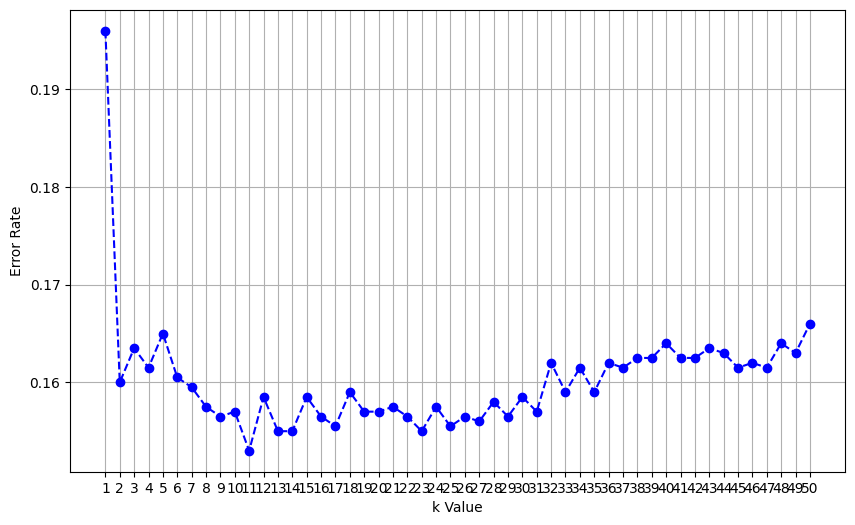

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(k_values,error_rates, marker = 'o', linestyle = '--', color = 'blue')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid()